<a href="https://colab.research.google.com/github/ritambharajha/Guidance_System_For_Retaliatory_Violence_Rochester_Using_NetworkAnalysis/blob/main/FeatureSelection_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1><center>Guidance System for Retaliatory Violence in Rochester using Network Analysis</center></H1>
<H2><center>**************Feature Selection**************</center></H2>
Advisor: Prof. Irshad Alteimer<br>
Team: Ritambhara Jha, Sreenidhi Sridhar, Carter Brazell

In [ ]:
#Mounting the google drive to get access to the dataset.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import statements
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

In [ ]:
#Reading the Dataset
dataset = "/content/drive/Shareddrives/CPSI Capstone Group/Excel_sheets/Prediction_Dataset.xlsx"
df = pd.read_excel(dataset)

In [ ]:
# Number of Days not used.  Needs to be mapped
x = df[['BetMedian', 'DegMedian', 'CloMedian', 'EigMedian', 'ClusCoeffMedian','Percentvictimmale','Percentvictimblack','Percentvictimlatino','Averagevictimage','Offense Differential','Proportion of Incidents that are Violent','Gang Involved','Intra-gang Fued','Drugs/$/Prop','RobberyCaused','Romantic','Neighbor Dispute','Family Retaliation','Social Media Chatter','Proxies Attacked','Proxy Property Damage','Proxies Threatened','Victim Accused of Snitching','Innocent Bystanders Hurt?','Active Disputants Caught with Weapons','Shotspotter activation','Jail Intelligence','Uncooperative Witness']]
y1 = df['Violent']
y2 = df['Total']

In [ ]:
#Violent
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y1, test_size = 0.20, random_state = 0)
#Total
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x, y2, test_size = 0.20, random_state = 0)

In [ ]:
selector1 = SelectKBest(f_classif, k=2) #Select 2 best features
selector2 = SelectKBest(f_classif, k=5) #Select 5 best features
selector3 = SelectKBest(f_classif, k=10) #Select 10 best features

In [ ]:
selector1.fit(xtrain1, ytrain1)
print('Top 2 Violent Features  :',selector1.get_feature_names_out())

Top 2 Violent Features  : ['Offense Differential' 'Proportion of Incidents that are Violent']


In [ ]:
xtrain1_selector1 = selector1.transform(xtrain1)
xtest1_selector1 = selector1.transform(xtest1)

In [ ]:
selector1.fit(xtrain2, ytrain2)
print('Top 2 Total Features  :',selector1.get_feature_names_out())

Top 2 Total Features  : ['ClusCoeffMedian' 'Offense Differential']


In [ ]:
xtrain2_selector1 = selector1.transform(xtrain2)
xtest2_selector1 = selector1.transform(xtest2)

In [ ]:
sc_x1 = StandardScaler()
sc_x2 = StandardScaler()

xtrain1_selector1 = sc_x1.fit_transform(xtrain1_selector1) 
xtest1_selector1 = sc_x1.transform(xtest1_selector1)
xtrain2_selector1 = sc_x2.fit_transform(xtrain2_selector1) 
xtest2_selector1 = sc_x2.transform(xtest2_selector1)

In [ ]:
selector2.fit(xtrain1, ytrain1)
print('Top 5 Violent Features  :',selector2.get_feature_names_out())

Top 5 Violent Features  : ['DegMedian' 'ClusCoeffMedian' 'Offense Differential'
 'Proportion of Incidents that are Violent' 'Jail Intelligence']


In [ ]:
xtrain1_selector2 = selector2.transform(xtrain1)
xtest1_selector2 = selector2.transform(xtest1)

In [ ]:
selector2.fit(xtrain2, ytrain2)
print('Top 5 Total Features  :',selector2.get_feature_names_out())

Top 5 Total Features  : ['DegMedian' 'ClusCoeffMedian' 'Offense Differential' 'Proxies Threatened'
 'Jail Intelligence']


In [ ]:
xtrain2_selector2 = selector2.transform(xtrain2)
xtest2_selector2 = selector2.transform(xtest2)

In [ ]:
sc_x1 = StandardScaler()
sc_x2 = StandardScaler()

xtrain1_selector2 = sc_x1.fit_transform(xtrain1_selector2) 
xtest1_selector2 = sc_x1.transform(xtest1_selector2)
xtrain2_selector2 = sc_x2.fit_transform(xtrain2_selector2) 
xtest2_selector2 = sc_x2.transform(xtest2_selector2)

In [ ]:
selector3.fit(xtrain1, ytrain1)
print('Top 10 Violent Features  :',selector3.get_feature_names_out())

Top 10 Violent Features  : ['DegMedian' 'CloMedian' 'ClusCoeffMedian' 'Offense Differential'
 'Proportion of Incidents that are Violent' 'Proxy Property Damage'
 'Innocent Bystanders Hurt?' 'Shotspotter activation' 'Jail Intelligence'
 'Uncooperative Witness']


In [ ]:
xtrain1_selector3 = selector3.transform(xtrain1)
xtest1_selector3 = selector3.transform(xtest1)

In [ ]:
selector3.fit(xtrain2, ytrain2)
print('Top 10 Total Features  :',selector3.get_feature_names_out())

Top 10 Total Features  : ['DegMedian' 'CloMedian' 'ClusCoeffMedian' 'Offense Differential'
 'Proxies Attacked' 'Proxy Property Damage' 'Proxies Threatened'
 'Innocent Bystanders Hurt?' 'Jail Intelligence' 'Uncooperative Witness']


In [ ]:
xtrain2_selector3 = selector3.transform(xtrain2)
xtest2_selector3 = selector3.transform(xtest2)

In [ ]:
sc_x1 = StandardScaler()
sc_x2 = StandardScaler()

xtrain1_selector3 = sc_x1.fit_transform(xtrain1_selector3) 
xtest1_selector3 = sc_x1.transform(xtest1_selector3)
xtrain2_selector3 = sc_x2.fit_transform(xtrain2_selector3) 
xtest2_selector3 = sc_x2.transform(xtest2_selector3)

In [ ]:
#SupportVectorRegressor Top 2
#Violent
regressor_V1 = SVR() 
regressor_V1.fit(xtrain1_selector1, ytrain1)
#Total
regressor_T1 = SVR() 
regressor_T1.fit(xtrain2_selector1, ytrain2)

SVR()

In [ ]:
#SupportVectorRegressor Top 5
#Violent
regressor_V2 = SVR() 
regressor_V2.fit(xtrain1_selector2, ytrain1)
#Total
regressor_T2 = SVR() 
regressor_T2.fit(xtrain2_selector2, ytrain2)

SVR()

In [ ]:
#SupportVectorRegressor Top 10
#Violent
regressor_V3 = SVR() 
regressor_V3.fit(xtrain1_selector3, ytrain1)
#Total
regressor_T3 = SVR() 
regressor_T3.fit(xtrain2_selector3, ytrain2)

SVR()

<h5>Grid Search is performed to optimize the model.</h5>

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid_V1 = GridSearchCV(regressor_V1,param_grid)
grid_T1 = GridSearchCV(regressor_T1,param_grid)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid_V2 = GridSearchCV(regressor_V2,param_grid)
grid_T2 = GridSearchCV(regressor_T2,param_grid)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid_V3 = GridSearchCV(regressor_V3,param_grid)
grid_T3 = GridSearchCV(regressor_T3,param_grid)

In [ ]:
grid_V1.fit(xtrain1_selector1, ytrain1)
grid_T1.fit(xtrain2_selector1, ytrain2)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [ ]:
grid_V2.fit(xtrain1_selector2, ytrain1)
grid_T2.fit(xtrain2_selector2, ytrain2)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [ ]:
grid_V3.fit(xtrain1_selector3, ytrain1)
grid_T3.fit(xtrain2_selector3, ytrain2)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [ ]:
print("---------------Violent--------------")
print(grid_V1.best_params_)
print(grid_V1.best_estimator_.get_params())
print("---------------Total--------------")
print(grid_T1.best_params_)
print(grid_T1.best_estimator_.get_params())

---------------Violent--------------
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
{'C': 1000, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
---------------Total--------------
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
{'C': 100, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
print("---------------Violent--------------")
print(grid_V2.best_params_)
print(grid_V2.best_estimator_.get_params())
print("---------------Total--------------")
print(grid_T2.best_params_)
print(grid_T2.best_estimator_.get_params())

---------------Violent--------------
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
{'C': 1000, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
---------------Total--------------
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
{'C': 100, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
print("---------------Violent--------------")
print(grid_V3.best_params_)
print(grid_V3.best_estimator_.get_params())
print("---------------Total--------------")
print(grid_T3.best_params_)
print(grid_T3.best_estimator_.get_params())

---------------Violent--------------
{'C': 1000, 'gamma': 1, 'kernel': 'linear'}
{'C': 1000, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
---------------Total--------------
{'C': 1000, 'gamma': 1, 'kernel': 'linear'}
{'C': 1000, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


<h5>Using the best parameters from the grid search to check for optimal solution.</h5>

In [ ]:
#SupportVectorRegressor Top 2
#Violent
regressor_V1 = SVR(C= 1000, cache_size= 200, coef0= 0.0, degree= 3, epsilon= 0.1, gamma= 0.01, kernel= 'rbf', max_iter= -1, shrinking= True, tol= 0.001, verbose= False) 
regressor_V1.fit(xtrain1_selector1, ytrain1)
#Total
regressor_T1 = SVR(C= 100, cache_size= 200, coef0= 0.0, degree= 3, epsilon= 0.1, gamma= 0.01, kernel= 'rbf', max_iter= -1, shrinking= True, tol= 0.001, verbose= False) 
regressor_T1.fit(xtrain2_selector1, ytrain2)

SVR(C=100, gamma=0.01)

In [ ]:
#SupportVectorRegressor Top 5
#Violent
regressor_V2 = SVR(C= 100, cache_size= 200, coef0= 0.0, degree= 3, epsilon= 0.1, gamma= 0.01, kernel= 'rbf', max_iter= -1, shrinking= True, tol= 0.001, verbose= False) 
regressor_V2.fit(xtrain1_selector2, ytrain1)
#Total
regressor_T2 = SVR(C= 100, cache_size= 200, coef0= 0.0, degree= 3, epsilon= 0.1, gamma= 0.01, kernel= 'rbf', max_iter= -1, shrinking= True, tol= 0.001, verbose= False) 
regressor_T2.fit(xtrain2_selector2, ytrain2)

SVR(C=100, gamma=0.01)

In [ ]:
#SupportVectorRegressor Top 10
#Violent
regressor_V3 = SVR(C= 100, cache_size= 200, coef0= 0.0, degree= 3, epsilon= 0.1, gamma= 0.0001, kernel= 'rbf', max_iter= -1, shrinking= True, tol= 0.001, verbose= False) 
regressor_V3.fit(xtrain1_selector3, ytrain1)
#Total
regressor_T3 = SVR(C= 1000, cache_size= 200, coef0= 0.0, degree= 3, epsilon= 0.1, gamma= 1, kernel= 'linear', max_iter= -1, shrinking= True, tol= 0.001, verbose= False) 
regressor_T3.fit(xtrain2_selector3, ytrain2)

SVR(C=1000, gamma=1, kernel='linear')

In [ ]:
y_pred_V1 = regressor_V1.predict(xtest1_selector1)
y_pred_T1 = regressor_T1.predict(xtest2_selector1)

ValueError: ignored

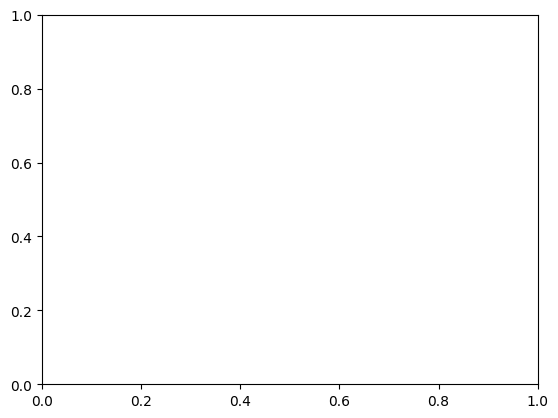

In [ ]:
#SupportVectorRegressor Top 2 Plot
#Violent
plt.scatter(xtrain1_selector1, ytrain1, color='darkorange', label='data')
plt.plot(xtrain1_selector1, y_pred_V1, color='cornflowerblue', label='predication')
plt.legend()
plt.show()

In [ ]:
#SupportVectorRegressor Top 2 Plot
#Total
plt.scatter(xtrain2_selector1, ytrain2, color='darkorange', label='data')
plt.plot(xtrain2_selector1, y_pred_T1, color='cornflowerblue', label='predication')
plt.legend()
plt.show()

In [ ]:
y_pred_V2 = regressor_V2.predict(xtest1_selector2)
y_pred_T2 = regressor_T2.predict(xtest2_selector2)

In [ ]:
#SupportVectorRegressor Top 5 Plot
#Violent
plt.scatter(xtrain1_selector2, ytrain1, color='darkorange', label='data')
plt.plot(xtrain1_selector2, y_pred_V2, color='cornflowerblue', label='predication')
plt.legend()
plt.show()

In [ ]:
#SupportVectorRegressor Top 5 Plot
#Total
plt.scatter(xtrain2_selector2, ytrain2, color='darkorange', label='data')
plt.plot(xtrain2_selector2, y_pred_T2, color='cornflowerblue', label='predication')
plt.legend()
plt.show()

In [ ]:
y_pred_V3 = regressor_V3.predict(xtest1_selector3)
y_pred_T3 = regressor_T3.predict(xtest2_selector3)

In [ ]:
#SupportVectorRegressor Top 10 Plot
#Violent
plt.scatter(xtrain1_selector3, ytrain1, color='darkorange', label='data')
plt.plot(xtrain1_selector3, y_pred_V3, color='cornflowerblue', label='predication')
plt.legend()
plt.show()

In [ ]:
#SupportVectorRegressor Top 10 Plot
#Total
plt.scatter(xtrain2_selector3, ytrain2, color='darkorange', label='data')
plt.plot(xtrain2_selector3, y_pred_T3, color='cornflowerblue', label='predication')
plt.legend()
plt.show()

In [ ]:
print("R2 for SVR - Violent Top 2",r2_score(ytest1, y_pred_V1))
print("R2 for SVR - Total Top 2",r2_score(ytest2, y_pred_T1))

R2 for SVR - Violent Top 2 -0.10601385464574675
R2 for SVR - Total Top 2 -0.03191387901020737


In [ ]:
print("R2 for SVR - Violent Top 5",r2_score(ytest1, y_pred_V2))
print("R2 for SVR - Total Top 5",r2_score(ytest2, y_pred_T2))

R2 for SVR - Violent Top 5 -0.07321652429502823
R2 for SVR - Total Top 5 0.04018804095164763


In [ ]:
print("R2 for SVR - Violent Top 10",r2_score(ytest1, y_pred_V3))
print("R2 for SVR - Total Top 10",r2_score(ytest2, y_pred_T3))

R2 for SVR - Violent Top 10 -0.06955167672603091
R2 for SVR - Total Top 10 0.08149184957996358


In [ ]:
#Top 2 Violent Features  : ['Offense Differential' 'Proportion of Incidents that are Violent']
mse_V1 = mean_squared_error(ytest1, y_pred_V1) 
mse_V1

4.584790996074756

In [ ]:
#Top 5 Violent Features  : ['DegMedian' 'ClusCoeffMedian' 'Offense Differential' 'Proportion of Incidents that are Violent' 'Jail Intelligence']
mse_V2 = mean_squared_error(ytest1, y_pred_V2)
mse_V2

4.448835280641674

In [ ]:
#Top 10 Violent Features  : ['DegMedian' 'CloMedian' 'ClusCoeffMedian' 'Offense Differential' 'Proportion of Incidents that are Violent' 'Proxy Property Damage' 'Innocent Bystanders Hurt?' 'Shotspotter activation' 'Jail Intelligence' 'Uncooperative Witness']
mse_V3 = mean_squared_error(ytest1, y_pred_V3)
mse_V3

4.433643282760502

In [ ]:
#Top 2 Total Features  : ['ClusCoeffMedian' 'Offense Differential']
mse_T1 = mean_squared_error(ytest2, y_pred_T1)
mse_T1

4.963184400775738

In [ ]:
#Top 5 Total Features  : ['DegMedian' 'ClusCoeffMedian' 'Offense Differential' 'Proxies Threatened' 'Jail Intelligence']
mse_T2 = mean_squared_error(ytest2, y_pred_T2)
mse_T2

4.616396619644325

In [ ]:
#Top 10 Total Features  : ['DegMedian' 'CloMedian' 'ClusCoeffMedian' 'Offense Differential' 'Proxies Attacked' 'Proxy Property Damage' 'Proxies Threatened' 'Innocent Bystanders Hurt?' 'Jail Intelligence' 'Uncooperative Witness']
mse_T3 = mean_squared_error(ytest2, y_pred_T3)
mse_T3

4.417738162919898